In [6]:
# Начальные данные. Функции

import numpy as np
import math
import random
import seaborn as sb
import matplotlib.pyplot as plt
from prettytable import PrettyTable

np.set_printoptions(precision=7, suppress=True)

k = 8
p = 0.7
n = 140

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [7]:
# Генерация выборки. Частоты. Вероятности

print("Вариант 9\nk =", k, "\np =", p, "\nn =", n)

P = np.array([])
for i in range(k + 1):
    cur = math.comb(k, i) * p ** i * (1 - p) ** (k - i)
    P = np.append(P, cur)
    
U = np.array([])
s = 0
for i in P:
    s += i
    U = np.append(U, s)

y = np.array([])
for i in range(n):
    y = np.append(y, random.random())

x = np.array([])
for y_n in y:
    for i in range(U.size):
        if y_n < U[i]:
            x = np.append(x, i)
            break
            
frequency = np.array([])
for i in range(k + 1):
    frequency = np.append(frequency, np.count_nonzero(x == i))
    
relative_frequency = np.array([])
for i in range(frequency.size):
    relative_frequency = np.append(relative_frequency, frequency[i] / n) 
    
accumulated_frequency = np.array([])
s = 0
for i in relative_frequency:
    s += i
    accumulated_frequency = np.append(accumulated_frequency, s)
    
print("Моделируем вектор из n случайных чисел\n")
print("y = ", y)
print("\n")
print("По вектору y разыгрываем вектор x в соответствии с алгоритмом\n")
print("x = ", x.astype(int))
print("\n")
print("Строим статистический ряд (здесь n=140)\n")
th = ['Значение СВ', 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = ['Частоты']
td = np.append(td, frequency)
td = np.append(td, ['Относительные частоты'])
td = np.append(td, np.around(relative_frequency, 3))
td = np.append(td, ['Накопительные частоты'])
td = np.append(td, np.around(accumulated_frequency, 3))

print_table(th, td)

print("Находим теоретический закон\n")
th = ['Значение СВ', 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = ['Вероятности']
td = np.append(td, np.around(P, 5))
td = np.append(td, "Кумулятивные вер-ти")
td = np.append(td, np.around(U, 5))
print_table(th, td)
print("\n")
print("Вероятности вычисляются по формуле Бернулли:\n p =", P)
print("\n")
print("Кумулятивные вероятности:\n u =", U)

Вариант 9
k = 8 
p = 0.7 
n = 140
Моделируем вектор из n случайных чисел

y =  [0.266936  0.7842311 0.4531888 0.1990223 0.3293414 0.6545052 0.3954182
 0.6657917 0.2498446 0.1942755 0.9656344 0.8465385 0.3002077 0.5724052
 0.8758306 0.6200511 0.8643499 0.5710674 0.0335136 0.7234802 0.2256729
 0.5121496 0.6358605 0.9993518 0.4085601 0.9132972 0.8817268 0.7498
 0.1810704 0.7516679 0.8105396 0.9403258 0.1227512 0.3539665 0.8588288
 0.6911343 0.57734   0.7338771 0.9664647 0.7707313 0.4987815 0.6448494
 0.8323934 0.4875341 0.934088  0.5710398 0.4357102 0.3878098 0.1112173
 0.7519835 0.7271448 0.3709952 0.5177602 0.3997271 0.6024594 0.7959922
 0.1397954 0.8114722 0.3786963 0.5878266 0.0708204 0.3614049 0.7075504
 0.7641378 0.5151809 0.8010712 0.6737845 0.9490169 0.7928962 0.2591068
 0.4813019 0.1553494 0.5087921 0.9049497 0.1319899 0.5302647 0.26626
 0.5092688 0.5982935 0.3654102 0.7808799 0.6889092 0.0610633 0.20765
 0.5236411 0.276905  0.8658901 0.1965937 0.3191942 0.0791149 0.0054974
 0.46

Строим совмещенные графики


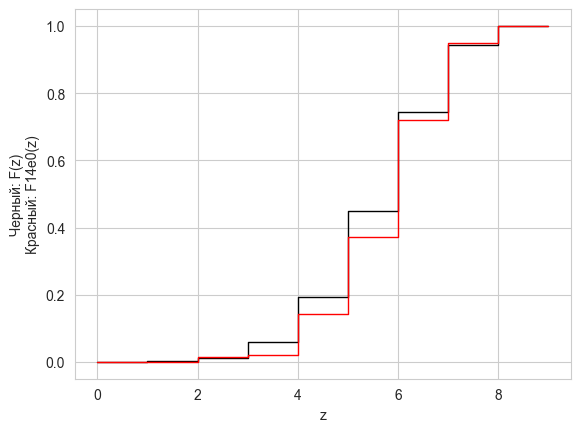

In [8]:
# График. Совмещенные функции

print("Строим совмещенные графики")
sb.set_style('whitegrid')
z = range(0, 10)
plt.step(z, [0.0] + U.tolist(), linewidth = 1.0, color='black')
plt.step(z, [0.0] + accumulated_frequency.tolist(), linewidth = 1.0, color='red')
plt.xlabel("z")
plt.ylabel("Черный: F(z)\nКрасный: F14e0(z)")
plt.show()

In [9]:
# Статистика Колмагорова

modul = np.array([0])
for i in range(k + 1):
    modul = np.append(modul, abs(accumulated_frequency[i] - U[i]))
    
print("Вычисление статистики Колмогорова для выборки из дискретного закона\n")
th = ['Интервалы', '(-inf,0]', '(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,+inf)']
td = ['Эмпирическая\nфункция\nраспределения\n', 0]
td = np.append(td, np.around(accumulated_frequency,4))
td = np.append(td, ['Теоретическая\nфункция\nраспределения\n'])
td = np.append(td, 0)
td = np.append(td, np.around(U, 4))
td = np.append(td, ['Модуль\nразности\n'])
td = np.append(td, np.around(modul, 4))

print_table(th, td)

print("Статистика Колмагорова:\n", np.amax(modul))

Вычисление статистики Колмогорова для выборки из дискретного закона

+---------------+----------+--------+--------+--------+--------+--------+--------+--------+--------+----------+
|   Интервалы   | (-inf,0] | (0,1]  | (1,2]  | (2,3]  | (3,4]  | (4,5]  | (5,6]  | (6,7]  | (7,8]  | (8,+inf) |
+---------------+----------+--------+--------+--------+--------+--------+--------+--------+--------+----------+
|  Эмпирическая |    0     |  0.0   |  0.0   | 0.0143 | 0.0214 | 0.1429 | 0.3714 | 0.7214 |  0.95  |   1.0    |
|    функция    |          |        |        |        |        |        |        |        |        |          |
| распределения |          |        |        |        |        |        |        |        |        |          |
|               |          |        |        |        |        |        |        |        |        |          |
| Теоретическая |    0     | 0.0001 | 0.0013 | 0.0113 | 0.058  | 0.1941 | 0.4482 | 0.7447 | 0.9424 |   1.0    |
|    функция    |          |       

In [10]:
# Вычисление характеристик. Вывод

print("Вычисление эмпирических и теоретических характеристик\n")

mn = x.mean()
m = sum(P[i] * i for i in range(k + 1))
D = sum((i - m) ** 2 * P[i] for i in range(k + 1))
S2 = 1/179 * sum((x[i] - mn) ** 2 for i in range(n))

print("Абсолютная величина разности выборочного среднего и теоретического мат ожидания мало\n", np.around(abs(mn-m), 5))
print("Отношение среднеквадратичных отклонений близко к единице\n", np.around(math.sqrt(S2/D), 5))
print("Следовательно, результаты моделирования можно признать удовлетворительными.")


Вычисление эмпирических и теоретических характеристик

Абсолютная величина разности выборочного среднего и теоретического мат ожидания мало
 0.17857
Отношение среднеквадратичных отклонений близко к единице
 0.80347
Следовательно, результаты моделирования можно признать удовлетворительными.
